In [1]:
import pandas as pd

In [2]:
from nsepy import get_history as gh
import datetime as dt

In [3]:
import pandas as pd
import datetime as dt
import kagglehub
import os

# Load the dataset
path = kagglehub.dataset_download("vijayvvenkitesh/microsoft-stock-time-series-analysis")
df = pd.read_csv(os.path.join(path, "Microsoft_Stock.csv"))
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Auto-select 150 days around the midpoint
mid_date = df['Date'].min() + (df['Date'].max() - df['Date'].min()) / 2
start = mid_date - pd.Timedelta(days=75)
end = mid_date + pd.Timedelta(days=75)

stk_data = df[(df['Date'] >= start) & (df['Date'] <= end)]
stk_data.set_index('Date', inplace=True)

print(f"Selected 150-day range: {start.date()} → {end.date()}")
print(f"Total rows: {len(stk_data)}")
print(stk_data.head())

Selected 150-day range: 2018-01-16 → 2018-06-15
Total rows: 105
                      Open   High    Low  Close    Volume
Date                                                     
2018-01-16 16:00:00  90.10  90.79  88.01  88.35  36599736
2018-01-17 16:00:00  89.08  90.28  88.75  90.14  25621164
2018-01-18 16:00:00  89.80  90.67  89.66  90.10  24159683
2018-01-19 16:00:00  90.14  90.61  89.66  90.00  36875013
2018-01-22 16:00:00  90.00  91.62  89.74  91.61  23601555


In [4]:
stk_data

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-16 16:00:00,90.10,90.79,88.01,88.35,36599736
2018-01-17 16:00:00,89.08,90.28,88.75,90.14,25621164
2018-01-18 16:00:00,89.80,90.67,89.66,90.10,24159683
2018-01-19 16:00:00,90.14,90.61,89.66,90.00,36875013
2018-01-22 16:00:00,90.00,91.62,89.74,91.61,23601555
...,...,...,...,...,...
2018-06-08 16:00:00,101.09,101.95,100.54,101.63,22165128
2018-06-11 16:00:00,101.37,101.59,100.67,101.05,23490894
2018-06-12 16:00:00,101.10,101.45,100.75,101.31,18325228


In [5]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [6]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (105, 1)


In [7]:
orders=[(1,1,1),(1,1,2),(2,3,1),(2,2,2)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)

C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE-Testset: 0.0901286045680312
maPe-Testset: 12170055968319.2


C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE-Testset: 0.08890910166533361
maPe-Testset: 10725742898491.018


C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE-Testset: 0.10710035789619969
maPe-Testset: 6421196178631.092
RMSE-Testset: 0.08922086577543391
maPe-Testset: 9910890543512.55


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


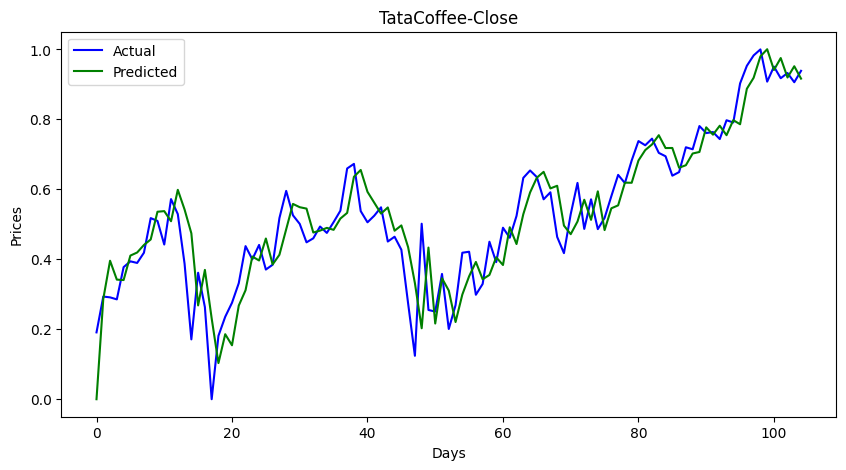

In [8]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [9]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [10]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

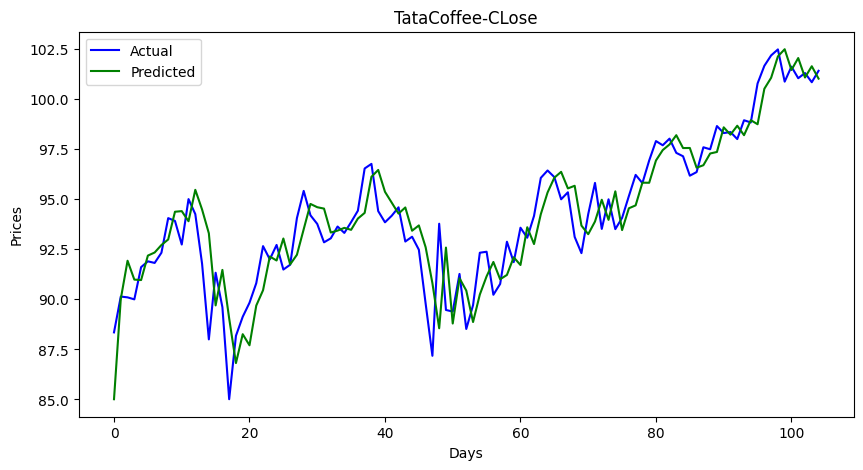

In [11]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [12]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [13]:
forecast

array([0.94874431, 0.94546743, 0.95651003, 0.96464039])

In [14]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [15]:
forecast_stock_price_test_oriF

,Closefore
0,101.594051
1,101.536771
2,101.729795
3,101.871914
